# Problema


# Datos

0. Instalaccion de librerias y material a utilizar

In [85]:
import pandas as pd
import numpy as np
import sys
import nltk
!{sys.executable} -m pip install pandas-profiling
!python -m spacy download es_core_news_sm

import re, string, unicodedata
import inflect
import nltk
import matplotlib.pyplot as plt


from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SpanishStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import joblib

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 33.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

1. Lectura de datos

In [86]:
data = pd.read_csv('fake_news_spanish.csv', sep=';', encoding = 'utf-8')

In [87]:
data.shape

(57063, 5)

In [88]:
data.dtypes

,0
ID,object
Label,int64
Titulo,object
Descripcion,object
Fecha,object


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57063 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           57063 non-null  object
 1   Label        57063 non-null  int64 
 2   Titulo       57047 non-null  object
 3   Descripcion  57063 non-null  object
 4   Fecha        57063 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


In [90]:
data.sample(10)

,ID,Label,Titulo,Descripcion,Fecha
1138,ID,1,El inspector de Asuntos Internos que vigiló a ...,El tribunal de la Audiencia Nacional que juzga...,07/02/2022
54886,ID,0,El Congreso congela el sueldo de los diputados...,La Mesa de la Cámara adopta un acuerdo para qu...,26/10/2022
14135,ID,0,Laura Martín esquiva el único debate en eusker...,El candidato de los populares declina particip...,02/07/2020
35569,ID,0,Municipales y autonómicas marcarán el ritmo de...,Los plazos para una investidura no empiezan a ...,30/04/2019
22454,ID,0,BNG y Cs le compran a EAJ-PNV 'eliminar' el le...,Vocales del Consejo Andaluz de Participación d...,28/05/2021
23016,ID,1,El Congreso aprueba quitar el veto al Senado e...,La Mesa no se pronunciará sobre un escrito del...,18/09/2018
15572,ID,0,Clemente se impone a Igea y será candidata de ...,La exmiembro del Iniciativa vers per Catalunya...,09/03/2019
20184,ID,0,Los torturadores franquistas de la prisión de ...,El militante anarquista murió en diciembre de ...,26/12/2021
12957,ID,1,Podemos anuncia una querella contra Batet por ...,La formación morada denuncia que la presidenta...,22/10/2021
25251,ID,1,El PSOE admite que ha fallado a la hora de exp...,Fuentes del PSOE sostienen que la pérdida de e...,16/02/2022


# Entendimiento de datos

Estadisticas descriptivas de las descripciones de las noticias:

*   Conteo: Numero total de caracteres de cada descripcion
*   Moda: La palabra mas frecuente de cada descripcion
*   Max: La longitud de la palabra mas larga de cada descripcion
*   Min: La longitud de la palabra mas corta de cada descripcion





In [91]:
from scipy import stats as st
from collections import Counter

data['Conteo'] = [len(x) for x in data['Descripcion']]
data['Moda'] = [Counter(i.lower().split()).most_common(1)[0][0] for i in data['Descripcion']]
data['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in data['Descripcion']]
data['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in data['Descripcion']]
data.head(10)

,ID,Label,Titulo,Descripcion,Fecha,Conteo,Moda,Max,Min
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,218,el,13,1
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,3251,que,17,1
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,169,de,13,2
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,133,que,15,2
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,242,a,14,1
5,ID,1,"El PNV consolida su mayoría, el PSE salva los ...",Los nacionalistas consiguen las alcaldías de B...,26/05/2019,209,los,14,1
6,ID,0,El exconsejero Núria Marín pide el indulto en ...,Sus familiares aluden a su honestidad e integr...,16/09/2022,100,a,10,1
7,ID,1,La Fiscalía pide prisión incondicional para lo...,Suprime el delito de rebelión que les imputó i...,26/09/2019,197,de,12,2
8,ID,1,"José Manuel Pérez Tornero, el creador de la te...",El futuro presidente de RTVE es licenciado en ...,25/02/2021,194,de,12,1
9,ID,0,La 'Ayusización' del BNG: Santiago Abascal ins...,Pablo Santiago Abascal planea vivir de las ren...,10/05/2021,232,de,12,2


Revision de nulos

In [92]:
data[data.columns].isnull().sum() / data.shape[0]

,0
ID,0.00000
Label,0.00000
Titulo,0.00028
Descripcion,0.00000
Fecha,0.00000
Conteo,0.00000
Moda,0.00000
Max,0.00000
Min,0.00000


In [93]:
cantidad_nulos = data["Titulo"].isnull().sum()
print("Cantidad de valores nulos en Titulo:", cantidad_nulos)

nulos = data[data["Titulo"].isnull()]
print("Datos con valores nulos:")
nulos.head(10)

Cantidad de valores nulos en Titulo: 16
Datos con valores nulos:


,ID,Label,Titulo,Descripcion,Fecha,Conteo,Moda,Max,Min
3243,ID,0,NaN,"Hace unos 75 años, Hermann Göring testificó en...",16/06/2019,526,que,24,1
4189,ID,0,NaN,"Evidentemente, Barak Obama ha sido arrestado e...",10/03/2022,8322,de,33,0
5041,ID,0,NaN,"""Después de convertirme en presidente, le pedí...",16/03/2022,1762,de,18,1
5644,ID,0,NaN,Me pasaron de buena fuente hoy (un vecino del ...,08/04/2023,783,el,36,1
7345,ID,0,NaN,Defienden dichos con capitulos de Don Gato.\n\...,02/07/2023,339,de,14,2
7652,ID,0,NaN,Lean (y vean la imagen) con mucha atención:\n\...,04/08/2018,3401,que,34,1
9700,ID,0,NaN,¿Sabías que Francisco Sagasti salió a marchar ...,26/12/2018,1392,la,14,1
15159,ID,0,NaN,Declarar a Bill Gates enemigo público y proces...,02/08/2024,2669,de,55,1
19415,ID,0,NaN,Con el fin de captar votos están dispuestos a ...,28/10/2017,844,de,29,0
24806,ID,0,NaN,CUANDO LAS IMÁGENES HABLAN MÁS QUE PALABRAS.\n...,28/06/2018,1626,que,22,1


Duplicados

In [94]:
cantidad_duplicados = data.duplicated(subset=['Titulo', 'Descripcion']).sum()
print("Cantidad de datos duplicados:", cantidad_duplicados)

duplicados = data[data.duplicated(subset=['Titulo', 'Descripcion'], keep=False)]
print("Datos duplicados:")
duplicados.head(10)

Cantidad de datos duplicados: 450
Datos duplicados:


,ID,Label,Titulo,Descripcion,Fecha,Conteo,Moda,Max,Min
25,ID,1,El Congreso aprueba por una holgada mayoría ab...,La norma recoge que el plazo de prescripción d...,15/04/2021,339,la,15,1
198,ID,1,La Junta Electoral archiva la denuncia del PSO...,"Otro juzgado madrileño, el de Instrucción núme...",23/04/2021,206,de,11,2
230,ID,1,El Gobierno solicita la licencia de obras para...,Los trabajos contemplados en el proyecto podrá...,12/04/2021,159,el,12,2
238,ID,1,El hombre que envió una navaja a la ministra M...,Acudió a declarar por su propio pie a dependen...,28/04/2021,207,a,12,1
243,ID,1,¿A qué hora puedo ir a votar en las elecciones...,La Comunidad de Madrid ha establecido una guía...,30/04/2021,148,de,15,2
384,ID,1,Los notarios ya pueden autorizar matrimonios s...,Con la entrada en vigor de la Ley del registro...,30/04/2021,234,la,13,2
491,ID,1,"Vivienda, sanidad, educación y migraciones: ¿Q...",Las formaciones pugnan en estos comicios por r...,19/04/2021,265,la,13,1
499,ID,1,La crisis hace aflorar otras formas sindicales,Los colectivos auto-organizados y los especial...,01/05/2021,171,los,16,1
511,ID,1,El gasto militar mundial batió récords en plen...,El nuevo informe del Stockholm International P...,26/04/2021,227,a,13,1
530,ID,1,Pedro Sánchez sigue siendo el líder más valora...,"El socialista no logra aprobar (4,4) y Pablo C...",19/04/2021,121,y,10,1


Distribucion entre noticias reales y falsas

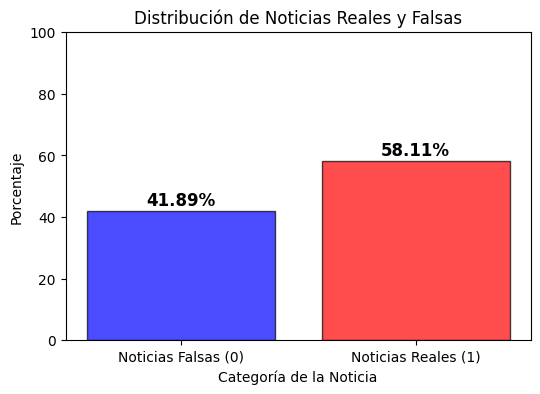

In [95]:
import matplotlib.pyplot as plt

label_counts = data['Label'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
bars = plt.bar(label_counts.index, label_counts.values, color=['red', 'blue'], alpha=0.7, edgecolor='black')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f"{bar.get_height():.2f}%",
             ha="center", fontsize=12, fontweight="bold")

plt.xticks([0, 1], labels=["Noticias Falsas (0)", "Noticias Reales (1)"])
plt.xlabel("Categoría de la Noticia")
plt.ylabel("Porcentaje")
plt.title("Distribución de Noticias Reales y Falsas")
plt.ylim(0, 100)
plt.show()

# Preparacion de datos

Eliminacion de duplicados

In [96]:
data = data.drop_duplicates(subset=['Titulo', 'Descripcion'], keep='first')
cantidad_duplicados = data.duplicated(subset=['Titulo', 'Descripcion']).sum()
print("Cantidad de datos duplicados:", cantidad_duplicados)

duplicados = data[data.duplicated(subset=['Titulo', 'Descripcion'], keep=False)]
print("Datos duplicados:")
duplicados.head(10)

Cantidad de datos duplicados: 0
Datos duplicados:


,ID,Label,Titulo,Descripcion,Fecha,Conteo,Moda,Max,Min


Modificacion de titulos nulos

In [97]:
data["Titulo"] = data["Titulo"].fillna(" ")
cantidad_nulos = data["Titulo"].isnull().sum()
print("Cantidad de valores nulos en Titulo", cantidad_nulos)

nulos = data[data["Titulo"] == " "]
print("Datos donde se reemplazo el titulo:")
display(nulos.head())

Cantidad de valores nulos en Titulo 0
Datos donde se reemplazo el titulo:


,ID,Label,Titulo,Descripcion,Fecha,Conteo,Moda,Max,Min
3243,ID,0,,"Hace unos 75 años, Hermann Göring testificó en...",16/06/2019,526,que,24,1
4189,ID,0,,"Evidentemente, Barak Obama ha sido arrestado e...",10/03/2022,8322,de,33,0
5041,ID,0,,"""Después de convertirme en presidente, le pedí...",16/03/2022,1762,de,18,1
5644,ID,0,,Me pasaron de buena fuente hoy (un vecino del ...,08/04/2023,783,el,36,1
7345,ID,0,,Defienden dichos con capitulos de Don Gato.\n\...,02/07/2023,339,de,14,2


Grafica de distribucion despues de correcion de datos

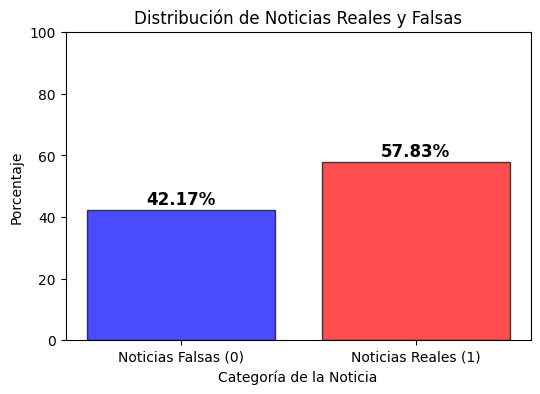

In [98]:
label_counts = data['Label'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
bars = plt.bar(label_counts.index, label_counts.values, color=['red', 'blue'], alpha=0.7, edgecolor='black')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f"{bar.get_height():.2f}%",
             ha="center", fontsize=12, fontweight="bold")

plt.xticks([0, 1], labels=["Noticias Falsas (0)", "Noticias Reales (1)"])
plt.xlabel("Categoría de la Noticia")
plt.ylabel("Porcentaje")
plt.title("Distribución de Noticias Reales y Falsas")
plt.ylim(0, 100)
plt.show()

Union del titulo y la descripcion

In [99]:
data["Texto"] = data["Titulo"] + " " + data["Descripcion"]

Limpieza de datos

In [100]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for i in words:
      new_words.append(i.lower())
    return new_words

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
   p = inflect.engine()
   new_words = []
   for word in words:
       if word.isdigit():
           new_word = p.number_to_words(word)
           new_words.append(new_word)
       else:
           new_words.append(word)
   return new_words

def remove_stopwords(words):
    new_words = []
    stop_words = set(stopwords.words('spanish'))
    for i in words:
      if i.lower() not in stop_words:
         new_words.append(i)
    return new_words

def remove_number_tags(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'\*NUMBER\*', '', word)
        new_word = new_word.strip()
        if new_word:
            new_words.append(new_word)
    return new_words

def remove_domains(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[\(\<]?\w+\.(com|net|org|gov|edu|es)[\)\>]?', '', word)
        new_word = new_word.strip()
        if new_word:
            new_words.append(new_word)
    return new_words

def clean_text(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    words = remove_number_tags(words)
    words = remove_domains(words)
    return words

Normalizacion

In [101]:
import spacy

def stem_words(words):
    stemmer = SpanishStemmer()
    new_words = []
    for word in words:
      new_words.append(stemmer.stem(word))
    return new_words

nlp = spacy.load("es_core_news_sm")

def lemmatize_verbs(words):
    new_words = []
    text = " ".join(words)
    doc = nlp(text)
    for sentence in doc.sents:
        new_words.extend([token.lemma_ for token in sentence])
    return new_words

def stem_and_lemmatize(words):
   stems = stem_words(words)
   lemma = lemmatize_verbs(words)
   return stems + lemma

Tokenizacion y aplicacion de limpieza de datos con normalizacion

In [102]:
data["Texto_tokenizado"] = data["Texto"].apply(word_tokenize)

data["Texto_limpiado"] = data["Texto_tokenizado"].apply(clean_text)

data["Texto_final"] = data["Texto_limpiado"].apply(stem_and_lemmatize)

data.head(10)

,ID,Label,Titulo,Descripcion,Fecha,Conteo,Moda,Max,Min,Texto,Texto_tokenizado,Texto_limpiado,Texto_final
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,218,el,13,1,'The Guardian' va con Sánchez: 'Europa necesit...,"['The, Guardian, ', va, con, Sánchez, :, 'Euro...","[the, guardian, va, sanchez, europa, necesita,...","[the, guardi, va, sanchez, europ, necesit, apu..."
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,3251,que,17,1,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,"[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...","[revelan, gobierno, negocio, liberacion, mirel...","[revel, gobiern, negoci, liber, mirel, cambi, ..."
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,169,de,13,2,El 'Ahora o nunca' de Joan Fuster sobre el est...,"[El, 'Ahora, o, nunca, ', de, Joan, Fuster, so...","[ahora, nunca, joan, fuster, estatuto, valenci...","[ahor, nunc, joan, fust, estatut, valencian, c..."
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,133,que,15,2,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","[Iglesias, alienta, a, Yolanda, Díaz, ,, ERC, ...","[iglesias, alienta, yolanda, diaz, erc, eh, bi...","[iglesi, alient, yoland, diaz, erc, eh, bildu,..."
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,242,a,14,1,Puigdemont: 'No sería ninguna tragedia una rep...,"[Puigdemont, :, 'No, sería, ninguna, tragedia,...","[puigdemont, seria, ninguna, tragedia, repetic...","[puigdemont, seri, ningun, tragedi, repeticion..."
5,ID,1,"El PNV consolida su mayoría, el PSE salva los ...",Los nacionalistas consiguen las alcaldías de B...,26/05/2019,209,los,14,1,"El PNV consolida su mayoría, el PSE salva los ...","[El, PNV, consolida, su, mayoría, ,, el, PSE, ...","[pnv, consolida, mayoria, pse, salva, papeles,...","[pnv, consol, mayori, pse, salv, papel, pp, si..."
6,ID,0,El exconsejero Núria Marín pide el indulto en ...,Sus familiares aluden a su honestidad e integr...,16/09/2022,100,a,10,1,El exconsejero Núria Marín pide el indulto en ...,"[El, exconsejero, Núria, Marín, pide, el, indu...","[exconsejero, nuria, marin, pide, indulto, cas...","[exconsejer, nuri, marin, pid, indult, cas, er..."
7,ID,1,La Fiscalía pide prisión incondicional para lo...,Suprime el delito de rebelión que les imputó i...,26/09/2019,197,de,12,2,La Fiscalía pide prisión incondicional para lo...,"[La, Fiscalía, pide, prisión, incondicional, p...","[fiscalia, pide, prision, incondicional, siete...","[fiscali, pid, prision, incondicional, siet, c..."
8,ID,1,"José Manuel Pérez Tornero, el creador de la te...",El futuro presidente de RTVE es licenciado en ...,25/02/2021,194,de,12,1,"José Manuel Pérez Tornero, el creador de la te...","[José, Manuel, Pérez, Tornero, ,, el, creador,...","[jose, manuel, perez, tornero, creador, televi...","[jos, manuel, perez, torner, creador, televisi..."
9,ID,0,La 'Ayusización' del BNG: Santiago Abascal ins...,Pablo Santiago Abascal planea vivir de las ren...,10/05/2021,232,de,12,2,La 'Ayusización' del BNG: Santiago Abascal ins...,"[La, 'Ayusización, ', del, BNG, :, Santiago, A...","[ayusizacion, bng, santiago, abascal, instruye...","[ayusiz, bng, santiag, abascal, instru, segu, ..."


In [103]:
data['Texto_final'] = data['Texto_final'].apply(lambda x: ' '.join(map(str, x)))
data.head(10)

,ID,Label,Titulo,Descripcion,Fecha,Conteo,Moda,Max,Min,Texto,Texto_tokenizado,Texto_limpiado,Texto_final
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,218,el,13,1,'The Guardian' va con Sánchez: 'Europa necesit...,"['The, Guardian, ', va, con, Sánchez, :, 'Euro...","[the, guardian, va, sanchez, europa, necesita,...",the guardi va sanchez europ necesit apuest fru...
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,3251,que,17,1,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,"[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...","[revelan, gobierno, negocio, liberacion, mirel...",revel gobiern negoci liber mirel cambi otorg p...
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,169,de,13,2,El 'Ahora o nunca' de Joan Fuster sobre el est...,"[El, 'Ahora, o, nunca, ', de, Joan, Fuster, so...","[ahora, nunca, joan, fuster, estatuto, valenci...",ahor nunc joan fust estatut valencian cumpl fo...
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,133,que,15,2,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","[Iglesias, alienta, a, Yolanda, Díaz, ,, ERC, ...","[iglesias, alienta, yolanda, diaz, erc, eh, bi...",iglesi alient yoland diaz erc eh bildu negoci ...
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,242,a,14,1,Puigdemont: 'No sería ninguna tragedia una rep...,"[Puigdemont, :, 'No, sería, ninguna, tragedia,...","[puigdemont, seria, ninguna, tragedia, repetic...",puigdemont seri ningun tragedi repeticion elec...
5,ID,1,"El PNV consolida su mayoría, el PSE salva los ...",Los nacionalistas consiguen las alcaldías de B...,26/05/2019,209,los,14,1,"El PNV consolida su mayoría, el PSE salva los ...","[El, PNV, consolida, su, mayoría, ,, el, PSE, ...","[pnv, consolida, mayoria, pse, salva, papeles,...",pnv consol mayori pse salv papel pp sig margin...
6,ID,0,El exconsejero Núria Marín pide el indulto en ...,Sus familiares aluden a su honestidad e integr...,16/09/2022,100,a,10,1,El exconsejero Núria Marín pide el indulto en ...,"[El, exconsejero, Núria, Marín, pide, el, indu...","[exconsejero, nuria, marin, pide, indulto, cas...",exconsejer nuri marin pid indult cas ere enriq...
7,ID,1,La Fiscalía pide prisión incondicional para lo...,Suprime el delito de rebelión que les imputó i...,26/09/2019,197,de,12,2,La Fiscalía pide prisión incondicional para lo...,"[La, Fiscalía, pide, prisión, incondicional, p...","[fiscalia, pide, prision, incondicional, siete...",fiscali pid prision incondicional siet cdr ter...
8,ID,1,"José Manuel Pérez Tornero, el creador de la te...",El futuro presidente de RTVE es licenciado en ...,25/02/2021,194,de,12,1,"José Manuel Pérez Tornero, el creador de la te...","[José, Manuel, Pérez, Tornero, ,, el, creador,...","[jose, manuel, perez, tornero, creador, televi...",jos manuel perez torner creador television edu...
9,ID,0,La 'Ayusización' del BNG: Santiago Abascal ins...,Pablo Santiago Abascal planea vivir de las ren...,10/05/2021,232,de,12,2,La 'Ayusización' del BNG: Santiago Abascal ins...,"[La, 'Ayusización, ', del, BNG, :, Santiago, A...","[ayusizacion, bng, santiago, abascal, instruye...",ayusiz bng santiag abascal instru segu estel p...


Eliminacion de columas

In [104]:
columnas_a_eliminar = ["ID", "Fecha", "Descripcion", "Titulo", "Texto_limpiado", "Texto_tokenizado", "Conteo", "Moda", "Max", "Min"]
data = data.drop(columns=columnas_a_eliminar)
data.head(10)

,Label,Texto,Texto_final
0,1,'The Guardian' va con Sánchez: 'Europa necesit...,the guardi va sanchez europ necesit apuest fru...
1,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,revel gobiern negoci liber mirel cambi otorg p...
2,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,ahor nunc joan fust estatut valencian cumpl fo...
3,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...",iglesi alient yoland diaz erc eh bildu negoci ...
4,0,Puigdemont: 'No sería ninguna tragedia una rep...,puigdemont seri ningun tragedi repeticion elec...
5,1,"El PNV consolida su mayoría, el PSE salva los ...",pnv consol mayori pse salv papel pp sig margin...
6,0,El exconsejero Núria Marín pide el indulto en ...,exconsejer nuri marin pid indult cas ere enriq...
7,1,La Fiscalía pide prisión incondicional para lo...,fiscali pid prision incondicional siet cdr ter...
8,1,"José Manuel Pérez Tornero, el creador de la te...",jos manuel perez torner creador television edu...
9,0,La 'Ayusización' del BNG: Santiago Abascal ins...,ayusiz bng santiag abascal instru segu estel p...


Revision de dimenciones

In [105]:
data.shape

(56613, 3)

Seleccion de variables

In [106]:
x_data = data["Texto_final"]
y_data = data["Label"]

Procesamiento TF-IDF: Mide la importancia de una palabra en cada una de las noticias ajustando el peso de la palabra segun su frecuencia

*   Max_df = Elimina palabras demasiado comunes en las noticias (Presentes en el 95% de ellas en este caso)
*   Min_df = Elimina palabras que salen en pocas noticias (en menos de 2 en este caso)



In [107]:
TF_IDF = TfidfVectorizer(max_df=0.95, min_df=2)
X_tf = TF_IDF.fit_transform(x_data)
print(X_tf.shape)
X_tf.toarray()[0]

joblib.dump(TF_IDF, "tfidf_vectorizer.pkl")

(56613, 42315)


['tfidf_vectorizer.pkl']

# Creacion de modelos de clasificacion

## A. Naive Bayes

Sebastian Palma

####Division de los datos

In [108]:
x_train, x_test = train_test_split(X_tf, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y_data, test_size=0.2, random_state=42)

#### Creacion y entrenamiento del modelo

In [109]:
modelo = MultinomialNB()
modelo.fit(x_train, y_train)

MultinomialNB()

####Predicción del modelo

In [110]:
y_pred = modelo.predict(x_test)
y_pred_prob = modelo.predict_proba(x_test)[:, 1]

#### Matriz de confusión

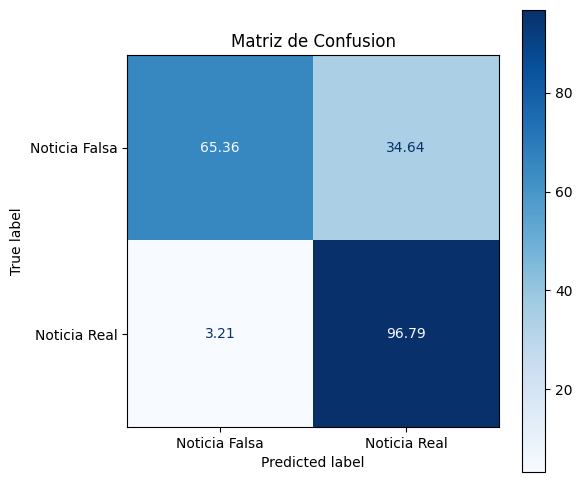

In [111]:
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=["Noticia Falsa", "Noticia Real"])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap="Blues", values_format=".2f", ax=ax)
plt.title("Matriz de Confusion")
plt.show()

####Accuracy, Recall y F-score

In [112]:
from sklearn.metrics import classification_report

print("Reporte de Clasificacion - Naive Bayes:\n")
print(classification_report(y_test, y_pred, target_names=["Noticia Falsa", "Noticia Real"]))

Reporte de Clasificacion - Naive Bayes:

               precision    recall  f1-score   support

Noticia Falsa       0.94      0.65      0.77      4882
 Noticia Real       0.79      0.97      0.87      6441

     accuracy                           0.83     11323
    macro avg       0.86      0.81      0.82     11323
 weighted avg       0.85      0.83      0.83     11323



####Validación cruzada

In [113]:
cross_val_scores = cross_val_score(modelo, x_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores)}")

Cross-Validation Scores: [0.83406933 0.82457496 0.83638772 0.83119894 0.83208214]
Mean Cross-Validation Score: 0.8316626186796203


## B. Regresión Logística
Juan Esteban Vásquez

Utilizando las divisiones ya generadas de los datos, vamos a crear ahora nuestro modelo de regresión logística

In [114]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Ahora, pasamos a predecir con nuestro modelo e intentar revisar como se ve comparado a los datos reales

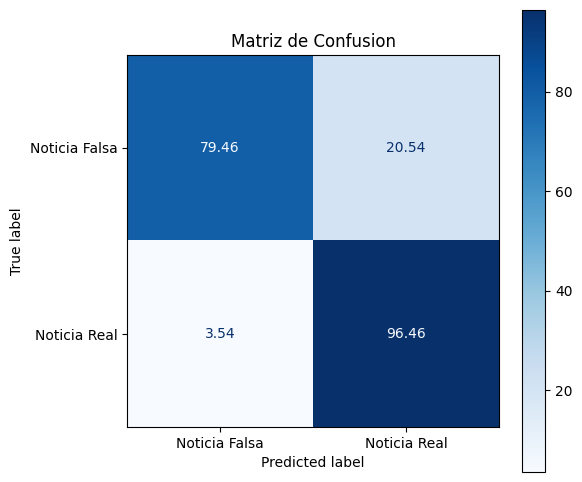

In [115]:
y_prediction = model.predict(x_test)
cm = confusion_matrix(y_test, y_prediction)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=["Noticia Falsa", "Noticia Real"])
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap="Blues", values_format=".2f", ax=ax)
plt.title("Matriz de Confusion")
plt.show()

Y ahora, pasamos a ver cómo se comportan las métricas utilizando este modelo

In [116]:
print("Reporte de Clasificacion - Regresión Logística:\n")
print(classification_report(y_test, y_prediction, target_names=["Noticia Falsa", "Noticia Real"]))

Reporte de Clasificacion - Regresión Logística:

               precision    recall  f1-score   support

Noticia Falsa       0.94      0.79      0.86      4882
 Noticia Real       0.86      0.96      0.91      6441

     accuracy                           0.89     11323
    macro avg       0.90      0.88      0.89     11323
 weighted avg       0.90      0.89      0.89     11323



## C. SVM (Máquina de Soporte Vectorial)
María Paula Murillo Corredor

Se escogió como tercer modelo SVM por su conocido uso para supervición y clasificación. El objetivo de este modelo es encontrar un hiperplano óptimo que separe las clases de modo que la distancia entre el hiperplano y los puntos de cada clase sea máxima. Especificamente se utiliza un SVM lineal, este es aquel donde los datos pueden separarse con una línea recta, se escogió este debido a que es un problema linealmente separable, además funciona bien con textos vectorizados (trabajo hecho en la preparación de los datos) y evita un sobreajuste mejor que otros modelos.

Para este modelo se utilizó LinearSVC debido a la longitud de el conjunto de datos de entrenamiento, siento este más óptimo para el manejo grandes datasets.

Creo modelo SVM con Kernel lineal

In [117]:
modelo_svm = LinearSVC(C=1.0, max_iter=5000)

Entrenaré el modelo con los datos que ya habían sido separados anteriormente.


In [118]:
modelo_svm.fit(x_train, y_train)

LinearSVC(max_iter=5000)

Hago predicciones con el subconjuto de prueba

In [119]:
y_pred_svm = modelo_svm.predict(x_test)

Evaluar Modelo

In [120]:
print("Reporte de Clasificación - SVM:\n")
print(classification_report(y_test, y_pred_svm, target_names=["Noticia Falsa", "Noticia Real"]))

Reporte de Clasificación - SVM:

               precision    recall  f1-score   support

Noticia Falsa       0.92      0.84      0.88      4882
 Noticia Real       0.89      0.94      0.91      6441

     accuracy                           0.90     11323
    macro avg       0.90      0.89      0.89     11323
 weighted avg       0.90      0.90      0.90     11323



Los resultados son los mejores a comparación de los modelos anteriores.

Matriz de Confusión

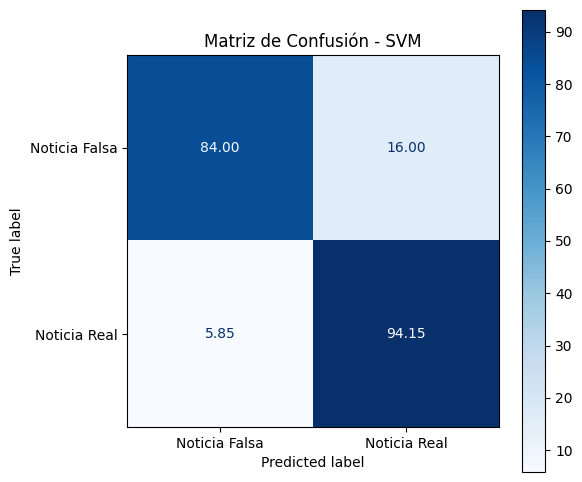

In [121]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm_percentage = cm_svm.astype('float') / cm_svm.sum(axis=1)[:, np.newaxis] * 100

disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm_percentage, display_labels=["Noticia Falsa", "Noticia Real"])
fig, ax = plt.subplots(figsize=(6, 6))
disp_svm.plot(cmap="Blues", values_format=".2f", ax=ax)
plt.title("Matriz de Confusión - SVM")
plt.show()

Los resultados de la matriz de confución son mejores que los modelos anteriores teniendo un valor en Falsos Positivos de 16 y en Falsos Negativos de 5.85.

Cross-Validation

In [122]:
from sklearn.model_selection import cross_val_score

cross_val_scores_svm = cross_val_score(modelo_svm, x_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cross_val_scores_svm}")
print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores_svm)}")

Cross-Validation Scores: [0.89600353 0.89821153 0.90229631 0.90362111 0.89997792]
Mean Cross-Validation Score: 0.9000220799293441


Cross validation nos muesta el rendimiento del modelo dividiendo los daros en partes para entrenar y evaluarlo en diferentes combinaciones. Los resultados indican que cada fold obtuvo entre un 89.99% y un 90.36% de precisión. Esto significa que el modelo es confiable.

# Resultados

#### Analisis de las palabras usadas para la identificacion de noticias falsas

In [123]:
import numpy as np

mapeo_palabras = {}
for original, procesado in zip(data["Texto"], data["Texto_final"]):
    palabras_orig = original.split()
    palabras_proc = procesado.split()
    for orig, proc in zip(palabras_orig, palabras_proc):
        mapeo_palabras[proc] = orig

feature_names = TF_IDF.get_feature_names_out()
coef = modelo_svm.coef_.flatten()
num_palabras = 20
top_fake = np.argsort(coef)[:num_palabras]
palabras_fake = [(mapeo_palabras.get(feature_names[i], feature_names[i]), coef[i]) for i in top_fake]

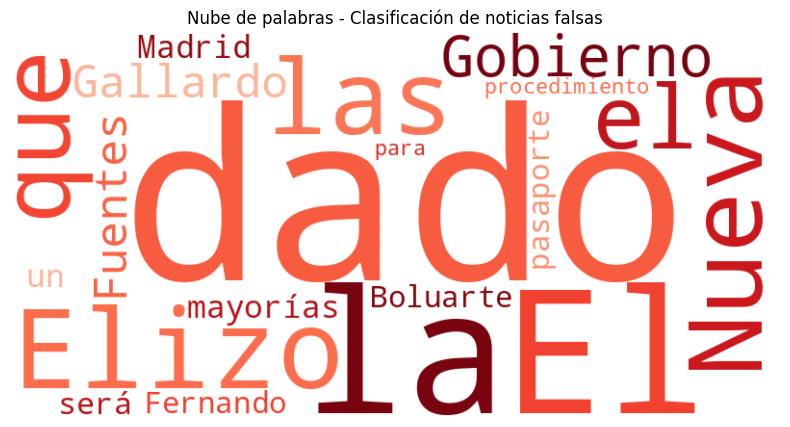

In [124]:
word_weights = {p[0]: abs(p[1]) for p in palabras_fake}

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate_from_frequencies(word_weights)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras - Clasificación de noticias falsas")
plt.show()

### Analisis

El análisis de palabras clave muestra una fuerte relación con la política española, ya que se hace referencia a personas como Fernando Clavijo, Gloria Elizo y Juan García-Gallardo, todos con diferentes trayectorias y afiliaciones en el gobierno Español. La presencia de estos nombres sugiere que la desinformación en torno a ellos podría estar relacionada con su papel en el Gobierno, el Congreso y partidos políticos en España.

### Utilidad

* Enfocandose en los temas más afectados por la desinformación, la organización puede optimizar sus esfuerzos en la lucha contra las fake news, destinando más recursos a la verificación de información política relacioanda con el gobierno Español.
*   Si al organizacion se enfoca en las palabras y temas más relevantes, puede asignar más recursos a la verificación de noticias relacionadas con temas políticos o administrativos en España.
* Al centrarse en las palabras y temas más relevantes relacionados con las fake news, la organización puede asignar más recursos a la verificación de noticias relacionadas con temas políticos o administrativos. Además, se pueden establecer alianzas con medios de comunicación especializados en fact-checking de este tipo de información.
* La organización puede desarrollar políticas internas que prioricen la verificación de noticias que contengan estas palabras clave, asegurando que la información difundida sea precisa y confiable para sus consumidores.

#### Datos a entregar etiquetados

In [125]:
data_predict = pd.read_csv('fake_news_test.csv', sep=';', encoding = 'utf-8')

In [126]:
data_predict["Texto"] = data_predict["Titulo"] + " " + data_predict["Descripcion"]

In [127]:
data_predict["Texto"] = data_predict["Texto"].astype(str).fillna("")

In [128]:
data_predict["Texto_tokenizado"] = data_predict["Texto"].apply(word_tokenize)

data_predict["Texto_limpiado"] = data_predict["Texto_tokenizado"].apply(clean_text)

data_predict["Texto_final"] = data_predict["Texto_limpiado"].apply(stem_and_lemmatize)

data_predict.head(10)

,ID,Titulo,Descripcion,Fecha,Texto,Texto_tokenizado,Texto_limpiado,Texto_final
0,ID,La mesa del congreso censura un encuentro inte...,"Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid...",30/10/2018,La mesa del congreso censura un encuentro inte...,"[La, mesa, del, congreso, censura, un, encuent...","[mesa, congreso, censura, encuentro, internaci...","[mes, congres, censur, encuentr, internacional..."
1,ID,La brecha digital que dificulta el acceso de a...,No es la primera vez que los ciudadanos vulner...,15/03/2023,La brecha digital que dificulta el acceso de a...,"[La, brecha, digital, que, dificulta, el, acce...","[brecha, digital, dificulta, acceso, ayudas, p...","[brech, digital, dificult, acces, ayud, person..."
2,ID,PP apremia al EQUO a presentar una propuesta d...,El partido morado reprocha que los socialistas...,01/07/2019,PP apremia al EQUO a presentar una propuesta d...,"[PP, apremia, al, EQUO, a, presentar, una, pro...","[pp, apremia, equo, presentar, propuesta, gobi...","[pp, apremi, equ, present, propuest, gobiern, ..."
3,ID,De soberano garante de la democracia a rey cor...,"La renuncia de Felipe VI a su herencia, proced...",16/03/2020,De soberano garante de la democracia a rey cor...,"[De, soberano, garante, de, la, democracia, a,...","[soberano, garante, democracia, rey, corrupto,...","[soberan, garant, democraci, rey, corrupt, apa..."
4,ID,El Gobierno aprobará este martes detraer los b...,El Ejecutivo también prorrogará la suspensión ...,13/09/2021,El Gobierno aprobará este martes detraer los b...,"[El, Gobierno, aprobará, este, martes, detraer...","[gobierno, aprobara, martes, detraer, benefici...","[gobiern, aprob, mart, detr, benefici, extraor..."
5,ID,Sánchez presenta unos Presupuestos con un gran...,Prevé una recaudación récords de 227.000 millo...,11/01/2019,Sánchez presenta unos Presupuestos con un gran...,"[Sánchez, presenta, unos, Presupuestos, con, u...","[sanchez, presenta, presupuestos, gran, aument...","[sanchez, present, presupuest, gran, aument, p..."
6,ID,La Casa Real ofrece sin matices los discursos ...,“Figura excepcional” o “ejemplo único de amor ...,30/06/2019,La Casa Real ofrece sin matices los discursos ...,"[La, Casa, Real, ofrece, sin, matices, los, di...","[casa, real, ofrece, matices, discursos, mas, ...","[cas, real, ofrec, matic, discurs, mas, franqu..."
7,ID,La Junta Electoral pide a Canal Sur que 'extre...,La Junta Electoral Central ha estimado parcial...,12/05/2022,La Junta Electoral pide a Canal Sur que 'extre...,"[La, Junta, Electoral, pide, a, Canal, Sur, qu...","[junta, electoral, pide, canal, sur, extreme, ...","[junt, electoral, pid, canal, sur, extrem, cui..."
8,ID,"'No puedo gobernar con ERC, para hacer la inde...",El exministro de Sanidad considera que Catalun...,05/02/2021,"'No puedo gobernar con ERC, para hacer la inde...","['No, puedo, gobernar, con, ERC, ,, para, hace...","[puedo, gobernar, erc, hacer, independencia, c...","[pued, gobern, erc, hac, independent, cuent, c..."
9,ID,Detenido un ultra frente a la casa de Pablo Mó...,La Guardia Civil ha detenido a un hombre vincu...,31/12/2020,Detenido un ultra frente a la casa de Pablo Mó...,"[Detenido, un, ultra, frente, a, la, casa, de,...","[detenido, ultra, frente, casa, pablo, monica,...","[deten, ultra, frent, cas, pabl, monic, garci,..."


In [129]:
columnas_a_eliminar = ["Texto_limpiado", "Texto_tokenizado", "Texto"]
data_predict = data_predict.drop(columns=columnas_a_eliminar)
data_predict.head(10)

,ID,Titulo,Descripcion,Fecha,Texto_final
0,ID,La mesa del congreso censura un encuentro inte...,"Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid...",30/10/2018,"[mes, congres, censur, encuentr, internacional..."
1,ID,La brecha digital que dificulta el acceso de a...,No es la primera vez que los ciudadanos vulner...,15/03/2023,"[brech, digital, dificult, acces, ayud, person..."
2,ID,PP apremia al EQUO a presentar una propuesta d...,El partido morado reprocha que los socialistas...,01/07/2019,"[pp, apremi, equ, present, propuest, gobiern, ..."
3,ID,De soberano garante de la democracia a rey cor...,"La renuncia de Felipe VI a su herencia, proced...",16/03/2020,"[soberan, garant, democraci, rey, corrupt, apa..."
4,ID,El Gobierno aprobará este martes detraer los b...,El Ejecutivo también prorrogará la suspensión ...,13/09/2021,"[gobiern, aprob, mart, detr, benefici, extraor..."
5,ID,Sánchez presenta unos Presupuestos con un gran...,Prevé una recaudación récords de 227.000 millo...,11/01/2019,"[sanchez, present, presupuest, gran, aument, p..."
6,ID,La Casa Real ofrece sin matices los discursos ...,“Figura excepcional” o “ejemplo único de amor ...,30/06/2019,"[cas, real, ofrec, matic, discurs, mas, franqu..."
7,ID,La Junta Electoral pide a Canal Sur que 'extre...,La Junta Electoral Central ha estimado parcial...,12/05/2022,"[junt, electoral, pid, canal, sur, extrem, cui..."
8,ID,"'No puedo gobernar con ERC, para hacer la inde...",El exministro de Sanidad considera que Catalun...,05/02/2021,"[pued, gobern, erc, hac, independent, cuent, c..."
9,ID,Detenido un ultra frente a la casa de Pablo Mó...,La Guardia Civil ha detenido a un hombre vincu...,31/12/2020,"[deten, ultra, frent, cas, pabl, monic, garci,..."


In [130]:
data_predict['Texto_final'] = data_predict['Texto_final'].apply(lambda x: ' '.join(map(str, x)))
data_predict.head(10)

,ID,Titulo,Descripcion,Fecha,Texto_final
0,ID,La mesa del congreso censura un encuentro inte...,"Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid...",30/10/2018,mes congres censur encuentr internacional parl...
1,ID,La brecha digital que dificulta el acceso de a...,No es la primera vez que los ciudadanos vulner...,15/03/2023,brech digital dificult acces ayud person vulne...
2,ID,PP apremia al EQUO a presentar una propuesta d...,El partido morado reprocha que los socialistas...,01/07/2019,pp apremi equ present propuest gobiern critic ...
3,ID,De soberano garante de la democracia a rey cor...,"La renuncia de Felipe VI a su herencia, proced...",16/03/2020,soberan garant democraci rey corrupt apart des...
4,ID,El Gobierno aprobará este martes detraer los b...,El Ejecutivo también prorrogará la suspensión ...,13/09/2021,gobiern aprob mart detr benefici extraordinari...
5,ID,Sánchez presenta unos Presupuestos con un gran...,Prevé una recaudación récords de 227.000 millo...,11/01/2019,sanchez present presupuest gran aument part so...
6,ID,La Casa Real ofrece sin matices los discursos ...,“Figura excepcional” o “ejemplo único de amor ...,30/06/2019,cas real ofrec matic discurs mas franquist rey...
7,ID,La Junta Electoral pide a Canal Sur que 'extre...,La Junta Electoral Central ha estimado parcial...,12/05/2022,junt electoral pid canal sur extrem cuid campa...
8,ID,"'No puedo gobernar con ERC, para hacer la inde...",El exministro de Sanidad considera que Catalun...,05/02/2021,pued gobern erc hac independent cuent conmig e...
9,ID,Detenido un ultra frente a la casa de Pablo Mó...,La Guardia Civil ha detenido a un hombre vincu...,31/12/2020,deten ultra frent cas pabl monic garci josu er...


In [131]:
TF_IDF = joblib.load("tfidf_vectorizer.pkl")
X_tf = TF_IDF.transform(data_predict["Texto_final"])

In [132]:
data_predict["Label"] = modelo_svm.predict(X_tf)
data_predict.head(10)

,ID,Titulo,Descripcion,Fecha,Texto_final,Label
0,ID,La mesa del congreso censura un encuentro inte...,"Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid...",30/10/2018,mes congres censur encuentr internacional parl...,0
1,ID,La brecha digital que dificulta el acceso de a...,No es la primera vez que los ciudadanos vulner...,15/03/2023,brech digital dificult acces ayud person vulne...,1
2,ID,PP apremia al EQUO a presentar una propuesta d...,El partido morado reprocha que los socialistas...,01/07/2019,pp apremi equ present propuest gobiern critic ...,0
3,ID,De soberano garante de la democracia a rey cor...,"La renuncia de Felipe VI a su herencia, proced...",16/03/2020,soberan garant democraci rey corrupt apart des...,1
4,ID,El Gobierno aprobará este martes detraer los b...,El Ejecutivo también prorrogará la suspensión ...,13/09/2021,gobiern aprob mart detr benefici extraordinari...,1
5,ID,Sánchez presenta unos Presupuestos con un gran...,Prevé una recaudación récords de 227.000 millo...,11/01/2019,sanchez present presupuest gran aument part so...,1
6,ID,La Casa Real ofrece sin matices los discursos ...,“Figura excepcional” o “ejemplo único de amor ...,30/06/2019,cas real ofrec matic discurs mas franquist rey...,1
7,ID,La Junta Electoral pide a Canal Sur que 'extre...,La Junta Electoral Central ha estimado parcial...,12/05/2022,junt electoral pid canal sur extrem cuid campa...,1
8,ID,"'No puedo gobernar con ERC, para hacer la inde...",El exministro de Sanidad considera que Catalun...,05/02/2021,pued gobern erc hac independent cuent conmig e...,1
9,ID,Detenido un ultra frente a la casa de Pablo Mó...,La Guardia Civil ha detenido a un hombre vincu...,31/12/2020,deten ultra frent cas pabl monic garci josu er...,0


In [133]:
data_predict.to_csv("fake_news_test_etiquetado.csv", index=False)